In [3]:
# Import the os module
import os
import sys
path = '/home/nicolas/random_sast/sast'

try:
    os.chdir(path)
    print("Current working directory: {0}".format(os.getcwd()))
except FileNotFoundError:
    print("Directory: {0} does not exist".format(path))
except NotADirectoryError:
    print("{0} is not a directory".format(path))
except PermissionError:
    print("You do not have permissions to change to {0}".format(path))

sys.path.append(r'C:\Users\Surface pro\random_sast\sast')

Current working directory: /home/nicolas/random_sast/sast


In [4]:
from utils_sast import znormalize_array, load_dataset, format_dataset, plot_most_important_features, plot_most_important_feature_on_ts
import numpy as np
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt


In [17]:
path="/home/nicolas/random_sast/sast/data"
ds='Chinatown' # Chosing a dataset from # Number of classes to consider

rtype="numpy2D"
ds_train_lds , ds_test_lds = load_dataset(ds_folder=path,ds_name=ds,shuffle=False)
X_test_lds, y_test_lds = format_dataset(ds_test_lds)
X_train_lds, y_train_lds = format_dataset(ds_train_lds)
X_train_lds=np.nan_to_num(X_train_lds)
y_train_lds=np.nan_to_num(y_train_lds)
X_test_lds=np.nan_to_num(X_test_lds)
y_test_lds=np.nan_to_num(y_test_lds)
y_train_lds

array([1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1])

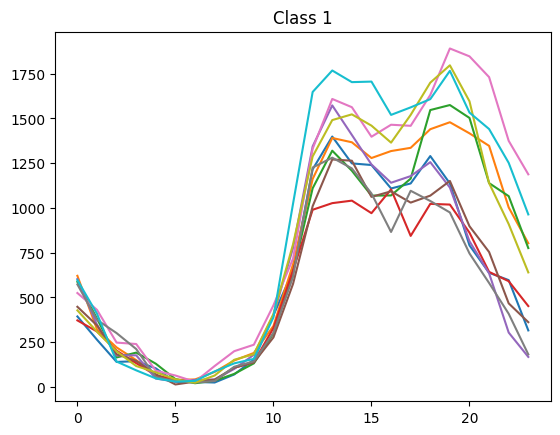

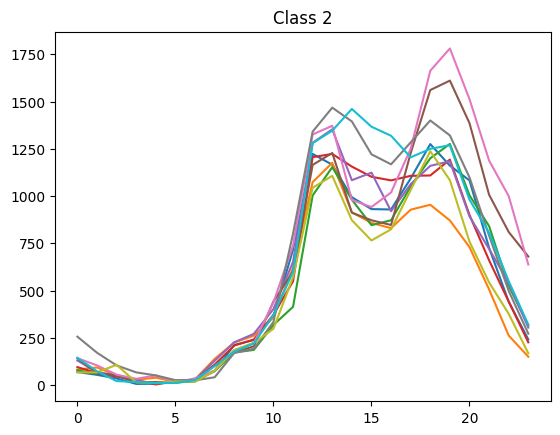

In [19]:

for c in np.unique(y_train_lds):
    X_train_lds_c = X_train_lds[y_train_lds == c]
    fig, ax = plt.subplots()
    for ts in X_train_lds_c:
        ax.plot(ts)

    ax.set(title='Class '+str(c))


    #fig.savefig("test.png")
plt.show()

In [9]:
acf_val, acf_confint = acf(X_train_lds_c[0], nlags=len(X_train_lds_c[0])-1,  alpha=.05)

In [ ]:
acf_confint

array([[ 1.        ,  1.        ],
       [ 0.51560444,  1.31575638],
       [ 0.09760014,  1.4067576 ],
       [-0.22986773,  1.33165649],
       [-0.48948303,  1.19187527],
       [-0.70450769,  1.02317841],
       [-0.89993172,  0.83713707],
       [-1.07590364,  0.66152844],
       [-1.24869485,  0.50448435],
       [-1.3816932 ,  0.42134213],
       [-1.46382142,  0.41930796],
       [-1.47418532,  0.49949945],
       [-1.43089482,  0.6183858 ],
       [-1.3663046 ,  0.73390635],
       [-1.29525898,  0.83521313],
       [-1.23566728,  0.91064646],
       [-1.17659928,  0.97757803],
       [-1.12778229,  1.02933608],
       [-1.08258079,  1.0752566 ],
       [-1.05569383,  1.10214754],
       [-1.04363034,  1.11437109],
       [-1.04205499,  1.11631758],
       [-1.05242192,  1.10635959],
       [-1.06363292,  1.09536428]])

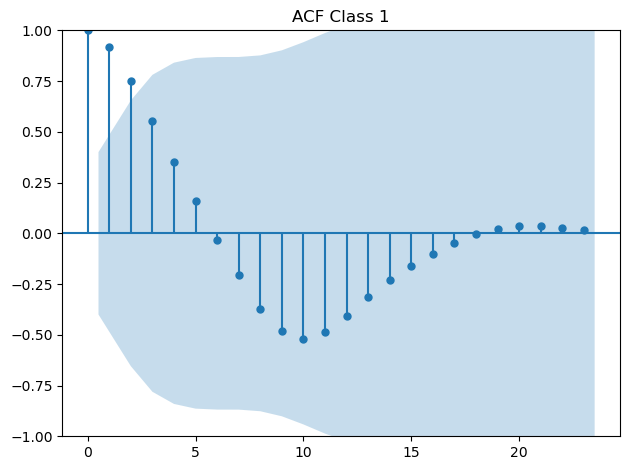

In [ ]:
plot_acf(X_train_lds_c[0], lags=len(X_train_lds_c[0])-1,  alpha=.05, title='ACF Class 1')
plt.tight_layout()
plt.show()

In [ ]:
pacf_val, pacf_confint = pacf(X_train_lds_c[0], method="ols", nlags=(len(X_train_lds_c[0])//2) - 1,  alpha=.05)

In [ ]:
pacf_confint

array([[ 1.00000000e+00,  1.00000000e+00],
       [ 5.42369014e-01,  1.34252096e+00],
       [-1.16040935e+00, -3.60257406e-01],
       [-4.83509013e-01,  3.16642933e-01],
       [-2.79187426e-01,  5.20964521e-01],
       [-9.93313451e-01, -1.93161505e-01],
       [-8.00734312e-01, -5.82366075e-04],
       [-2.45875613e-01,  5.54276333e-01],
       [-9.57753053e-01, -1.57601107e-01],
       [-3.61496315e-01,  4.38655631e-01],
       [-5.91167144e-01,  2.08984802e-01],
       [ 9.00749045e-01,  1.70090099e+00]])

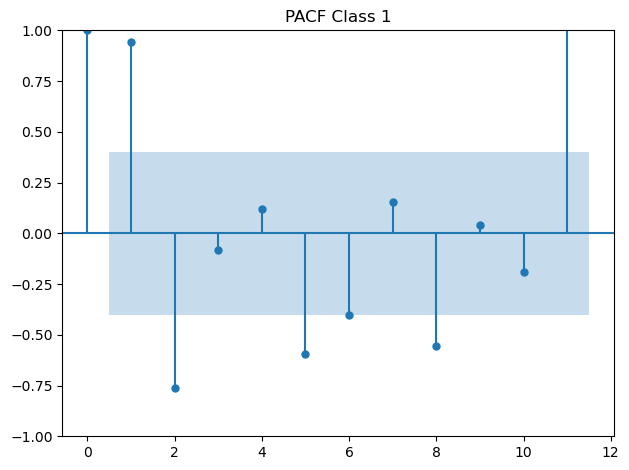

In [ ]:
plot_pacf(X_train_lds_c[0], lags=len(X_train_lds_c[0])//2-1,  alpha=.05, title='PACF Class 1', method="ols")
plt.tight_layout()
plt.show()